EDA with Red Wine DeprecationWarningEDA With Red Wine Data

Data Set Information:


The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information:


Input variables (based on physicochemical tests):

1-fixed acidity

2-volatile acidity

3-citric acid

4-residual sugar

5-chlorides

6-free sulfur dioxide

7-total sulfur dioxide

8-density

9-pH

10-sulphates

11-alcohol

output variable(based on sensory data:)
12-quality (score between 0 and 10)








In [1]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
##summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
## Discriptive summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
## shape of dataset
df.shape

(1599, 12)

In [5]:
##list down all the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
df['quality'].value_counts()
##its a unbalanced dataset


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
##missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
## to check duplicate values
df.duplicated().sum()

np.int64(240)

In [10]:
##to remove duplicate values
df.drop_duplicates(inplace=True) 

In [11]:
df.shape

(1359, 12)

In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

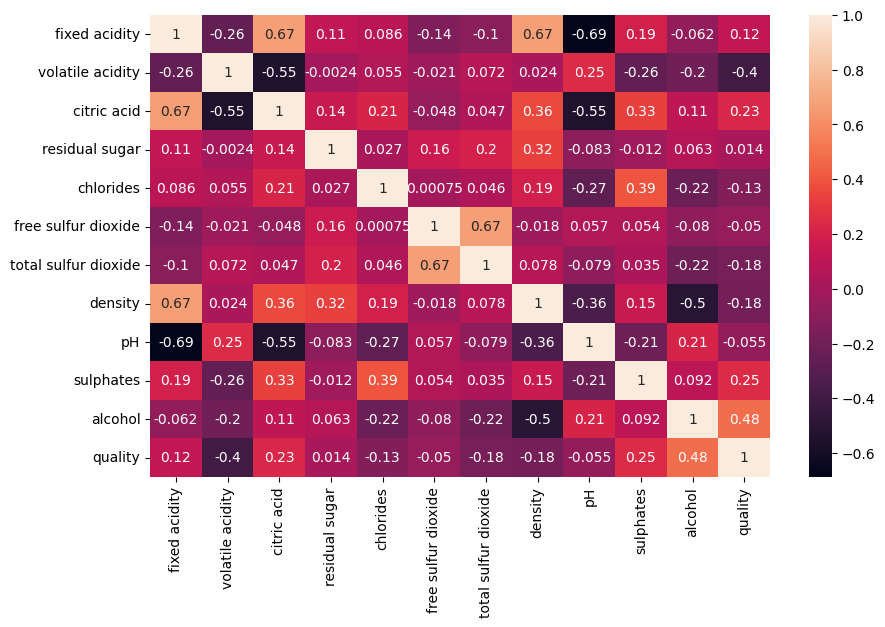

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='quality'>

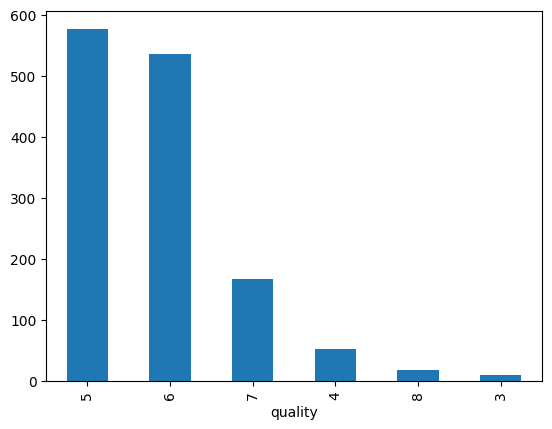

In [14]:
df.quality.value_counts().plot(kind='bar')

In [15]:
import seaborn as sns

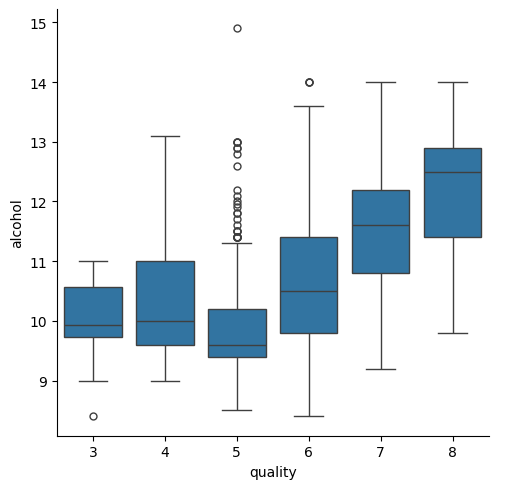

In [16]:
#catgorical plot
sns.catplot(x='quality',y='alcohol',data=df,kind='box')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
## read the dataset
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.shape

(1000, 8)

3. Data Checks to Perform
> - Check for missing values
> - Check for duplicate values
> - Check data types of each column
> - check the number of unique values in each column
> - Checks statistics of data set
> - check various categories present in the diffferent columns

In [20]:
## Checks for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [25]:
[[feature for feature in df.columns if df[feature].dtype != object]]


[['math_score', 'reading_score', 'writing_score']]

In [26]:
#segregate the numerical and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != object]
categorical_features=[feature for feature in df.columns if df[feature].dtype == object]

In [29]:
#Aggregate the total score with mean
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

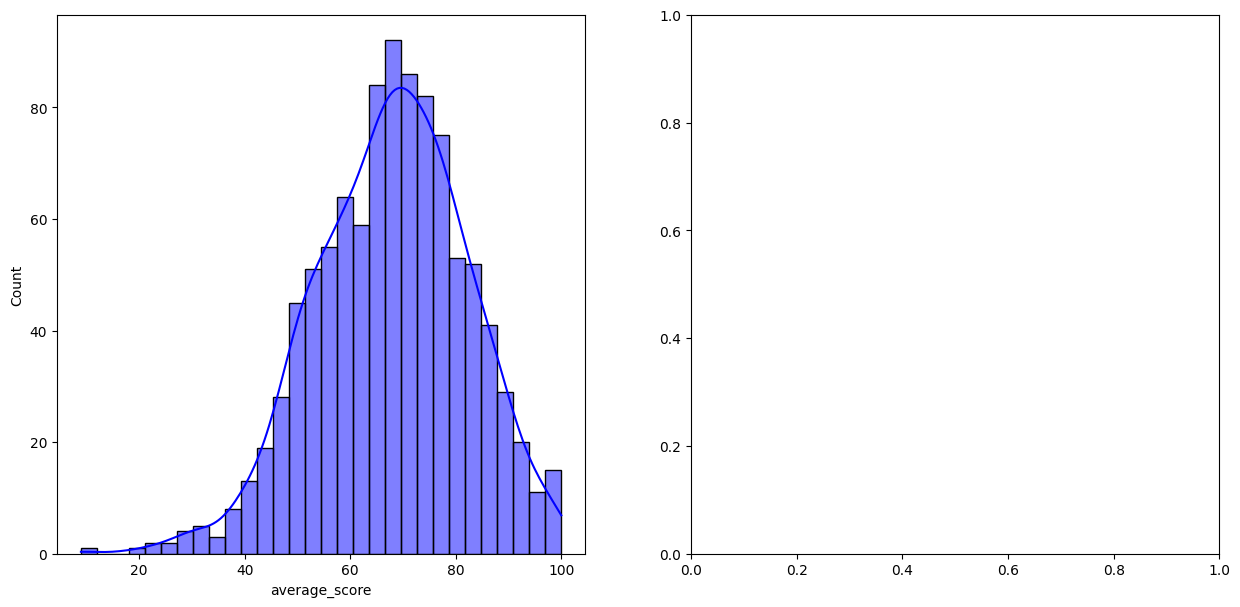

In [35]:
#we will exploring more visualization 
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='blue')

Insights

Female students tend to score higher on average compared to male students.

<Axes: xlabel='average_score', ylabel='Count'>

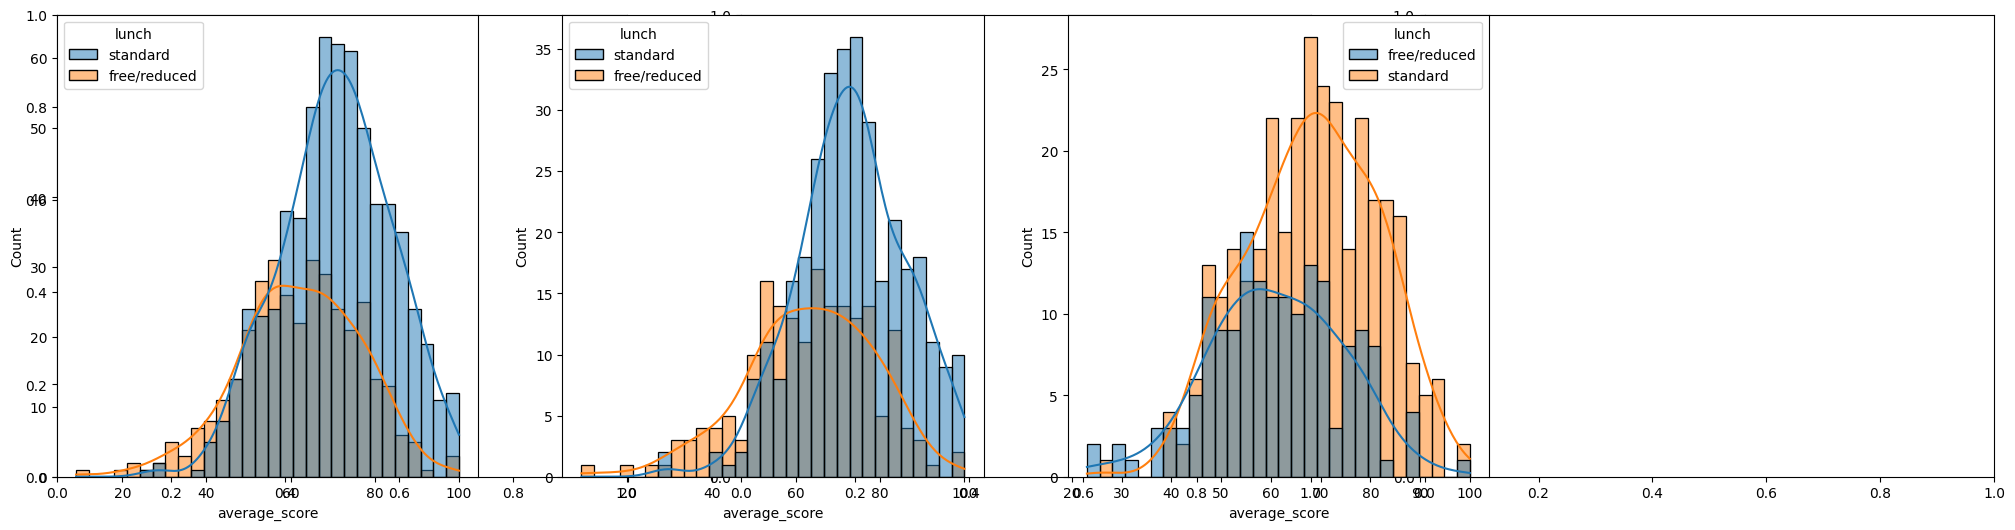

In [38]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',bins=30,kde=True,hue='lunch')

Insights:
- Standerd lunch help students perform well in exams
- Standard lunch helps perform better in exams be it a male of female

<Axes: xlabel='average_score', ylabel='Count'>

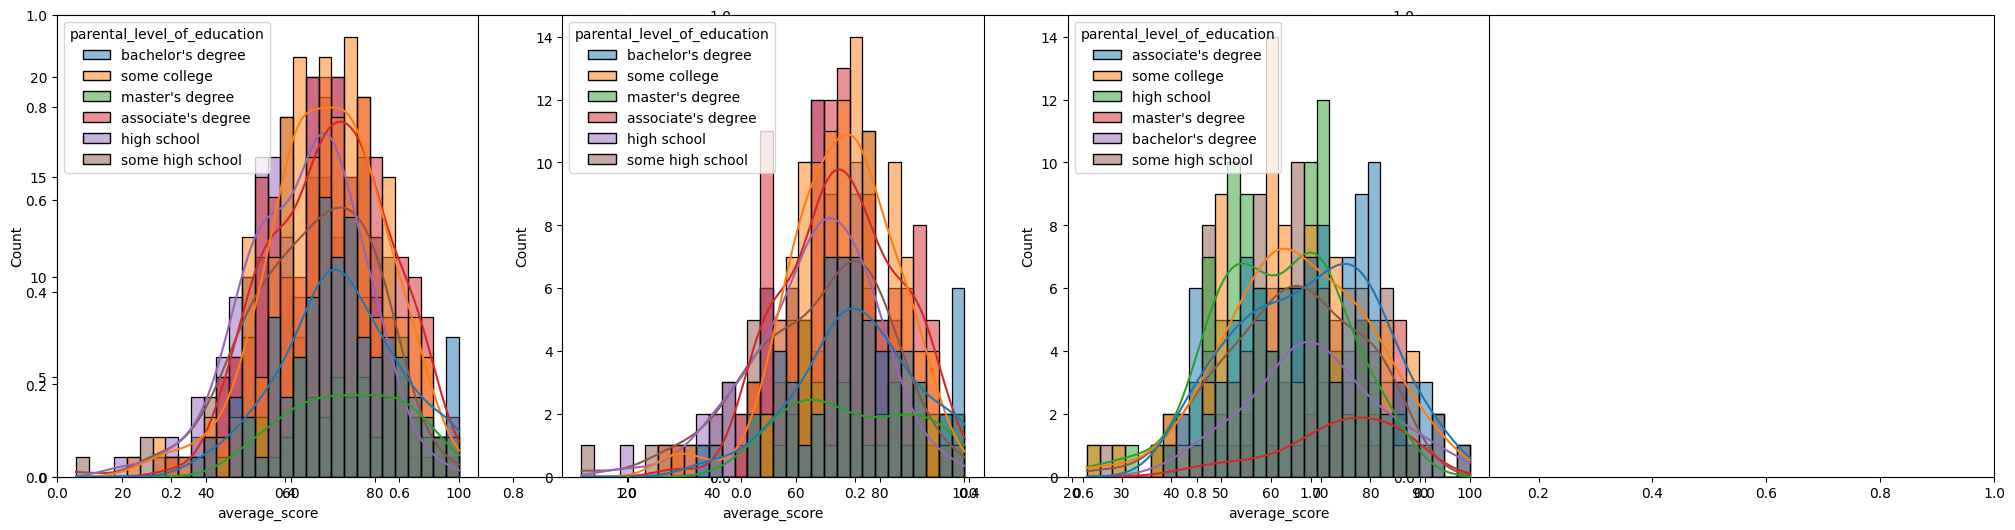

In [39]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')

Insights:
> In gerneral parent's education don't help student to perform better in exam.

> 2rd plot we can see there is no effect of parent's education on female students.

> 3nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam



<Axes: >

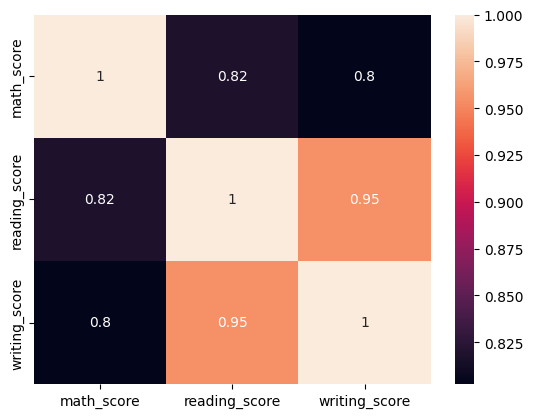

In [43]:
# Select only numeric columns for correlation
numeric_df = df[numerical_features]
sns.heatmap(numeric_df.corr(), annot=True)